# Employing medical information to perform classification analysis and predict the likelihood of heart disease.


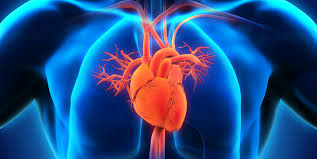

In [54]:
Image(filename="img/heart diseases.jpg(2).jpg", width=800, height=200)

# INTRODUCTION

> - **Heart disease** refers to a class of medical conditions that affect the heart and blood vessels. These conditions can range from minor issues to life-threatening diseases, and they typically involve the buildup of fatty deposits (atherosclerosis) or other factors that can narrow or block blood vessels, reducing blood flow to the heart or other parts of the body. Moreover, **heart diseases** we can call it **cardiovascular disease (CVD)**

       So here are some of the comon types of the heart diseases

> - **Hypertension (High Blood Pressure)**: Persistent high blood pressure can strain the heart and blood vessels over time, increasing the risk of heart disease, stroke, and other health problems.

> - **Heart Failure**: Heart failure is a condition where the heart is unable to pump blood effectively, leading to symptoms like fatigue, shortness of breath, and fluid retention.

> - **Arrhythmias**: Arrhythmias are abnormal heart rhythms. They can include conditions like atrial fibrillation (irregular and rapid heartbeat) and bradycardia (slow heartbeat).

> - **Valvular Heart Disease**: This includes conditions where the heart valves do not function properly, such as mitral valve prolapse or aortic stenosis.

> - **Congenital Heart Disease**: Some people are born with heart defects that affect the structure or function of the heart. These can vary widely in severity.

> - **Furthermore** heart disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the **No. 1** cause of **death** in the **WOLRD** right now.


# 1. Acquiring the Essential Libraries and Importing the Dataset

- In this section we will **import** the heart_disease.csv file into the jupyter notebopk and look at some basic information like number of rows and columns, their datatypes, notes(if any), missing values(if any).
- Before importing the dataset, let's **import** the **basic libraries** for machine learning like pandas, numpy, matplotlib, seaborn


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objects as go

 # for enabling matplotlib to visualize
%matplotlib inline

**These are common libraries that are used but as we go foward,Many libraries will be imported**


**Dataset be can imported by various libraries but Pandas library can be easy and simple way to import**


In [3]:
# Importing the Dataset using .read_csv() function of pandas
# We will call the dataset as 'heart'
heart = pd.read_csv("heart diseases.csv")
heart

FileNotFoundError: [Errno 2] No such file or directory: 'heart diseases.csv'

In [3]:
# Let's check at least five(5) rows of the dataset using .head() function of pandas(library)
heart.head(4)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1


# 2. Features of the dataset


# **The dataset's creator provided limited information, which I will document here for reference.**

- This dataset contains **12 columns**
- This dataset consists of **11 features** and a **target variable**. It has **6 nominal variables (nom)** and **5 numeric variables (num)**. The detailed description of all the features are given below:

### Features

1. **age**: Patients Age in years **(num)**
2. **sex**: Gender of patient **(Male - 1, Female - 0) (nom)**
3. **chest_pain_type**: Type of chest pain experienced by patient categorized into **1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic (nom)**
4. **resting_blood_pressure**: Level of blood pressure at resting mode in mm/HG **(num)**
5. **cholestrol**: Serum cholestrol in mg/dl **(num)**
6. **fasting_blood_sugar**: Blood sugar levels on fasting > 120 mg/dl represents as **1** in case of **true** and **0** as **false (nom)**
7. **rest_ecg**: Result of electrocardiogram while at rest are represented in 3 distinct values **0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (nom)**
8. **max_heart_rate_achieved**: Maximum heart rate achieved **(num)**
9. **exercise_induced_angina**: Angina induced by exercise **0** depicting **NO** 1 depicting **Yes (nom)**
10. **old_peak**: Exercise induced ST-depression in comparison with the state of rest **(num)**
11. **st_slope**: ST segment measured in terms of slope during peak exercise **0: Normal 1: Upsloping 2: Flat 3: Downsloping (nom)**

### Target variable

12. **target**: It is the target variable which we have to predict **1-** means patient is **suffering from heart risk** and **0-** means patient is **normal. (nom)**


# 3. Explaratory Data Analysis(EDA)

- As we can see from above dataset **entries** some of the **features** should be **nominal**. In the next step we will be converting the **features** into their respective **category** as per the **dataset description**.

- **Before proceeding further, to make the indexing of columns easier we have changed the names of column into simplified terms so that it can be called easily in future**


In [4]:
# Renaming feature names
heart.columns = [
    "age",
    "sex",
    "chest_pain_type",
    "resting_blood_pressure",
    "cholesterol",
    "fasting_blood_sugar",
    "rest_ecg",
    "max_heart_rate_achieved",
    "exercise_induced_angina",
    "old_peak",
    "st_slope",
    "target",
]

In [5]:
heart.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
# We get the basic information of the dataset using .info() function of pandas
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1190 non-null   int64  
 1   sex                      1190 non-null   int64  
 2   chest_pain_type          1190 non-null   int64  
 3   resting_blood_pressure   1190 non-null   int64  
 4   cholesterol              1190 non-null   int64  
 5   fasting_blood_sugar      1190 non-null   int64  
 6   rest_ecg                 1190 non-null   int64  
 7   max_heart_rate_achieved  1190 non-null   int64  
 8   exercise_induced_angina  1190 non-null   int64  
 9   old_peak                 1190 non-null   float64
 10  st_slope                 1190 non-null   int64  
 11  target                   1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
# Checking missing entries in the dataset columnwise
heart.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
old_peak                   0
st_slope                   0
target                     0
dtype: int64

 By observing the information of the dataset since all the values are in **float & int datatype** and there is not missing values in our dataframe so its confirmed that our dataset is clean


In [8]:
# Using .describe() function of pandas we can able to know some basic parameters(mean,max and others like std) of each columns
heart.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,old_peak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# 4. Data Visualization from Pandas, Numpy, and Seaborn.

- In this section we will **visualize** the **data** with the help of various **plots**.


In [9]:
# First checking the shape of the dataset(how many columns and rows are there in our data? )
heart.shape

(1190, 12)

In [10]:
heart['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

Therefore, there are total **1190 records** and **11 features** with **1 target variable**.


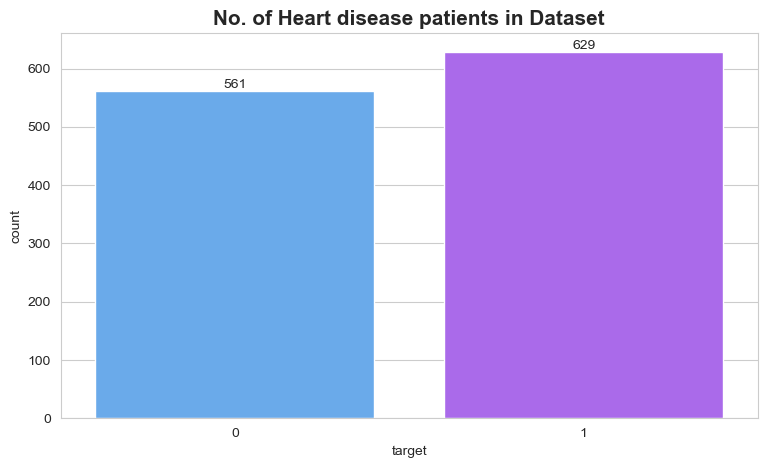

In [11]:
# Creaing a countplot using .countplot() of sns library for 'Distribution of Heart disease (target variable)'

fig = plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
ax = sns.countplot(x=heart["target"], data=heart, palette="cool")


# Title for the countplot
plt.title("No. of Heart disease patients in Dataset", weight="bold", fontsize=15)

# 'edge' places labels at the edges of the bars
for i in ax.containers:
    ax.bar_label(i, label_type="edge")

Text(0.5, 1.0, 'No. of Heart disease patients in Dataset')

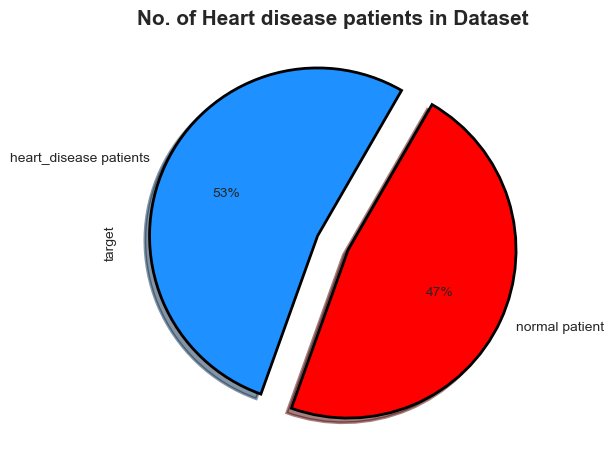

In [93]:
# creating the pie chart for 'Target Variable' in their percentage
plt.figure(figsize=(18, 12))
plt.subplot(221)
custom_colors = ["dodgerblue", "red"]

heart["target"].value_counts().plot.pie(
    autopct="%1.0f%%",
    colors=custom_colors,
    startangle=60,
    labels=["heart_disease patients", "normal patient"],
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.1, 0.1],
    shadow=True,
)


# Title for pie chart
plt.title("No. of Heart disease patients in Dataset", weight="bold", fontsize=15)

From the above **plot** it clearly specifies that the dataset is **balanced** having **629 heart disease** patients and **561 normal** patients

The percentage is **53% for heart disease patients** and **47% for normal patients** which is not a big difference from them


In [12]:
heart['sex'].value_counts()

1    909
0    281
Name: sex, dtype: int64

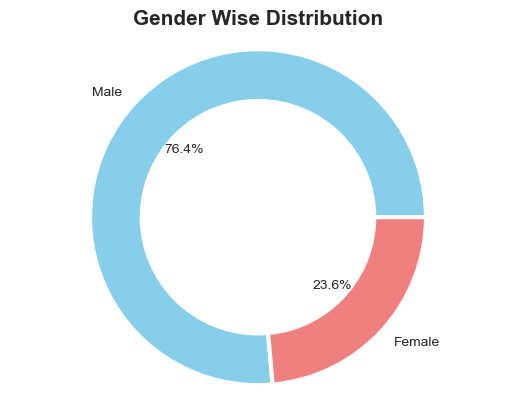

In [94]:
# Creaing a countplot using .countplot() of Seaborn library for 'Gender wise distribution'

gender_counts = heart["sex"].value_counts()

# Create a donut chart
plt.pie(
    gender_counts,
    labels=["Male", "Female"],
    autopct="%1.1f%%",
    colors=["skyblue", "lightcoral"],
    wedgeprops={"edgecolor": "white", "linewidth": 3},
)
plt.gca().add_artist(plt.Circle((0, 0), 0.7, fc="white"))

# Title for Donus chart
plt.title("Gender Wise Distribution", weight="bold", fontsize=15)

plt.axis("equal")
plt.show()

> - As we can see from the above plot, in this dataset **males** percentage is much **higher** compared to **females**.
> - Which is approximately to **904 of male** and **286 of female**


In [13]:
heart['age'].value_counts()

54    67
58    58
57    50
52    47
55    47
59    47
56    47
51    47
62    46
60    44
53    40
48    38
61    38
63    37
41    33
50    32
64    31
43    31
46    31
44    29
65    29
49    27
42    26
45    25
67    23
47    23
66    19
39    18
38    17
69    16
40    16
35    14
37    13
68    13
70    11
34     9
74     8
71     8
36     6
32     5
72     4
29     4
77     3
75     3
76     3
33     2
31     2
30     1
28     1
73     1
Name: age, dtype: int64

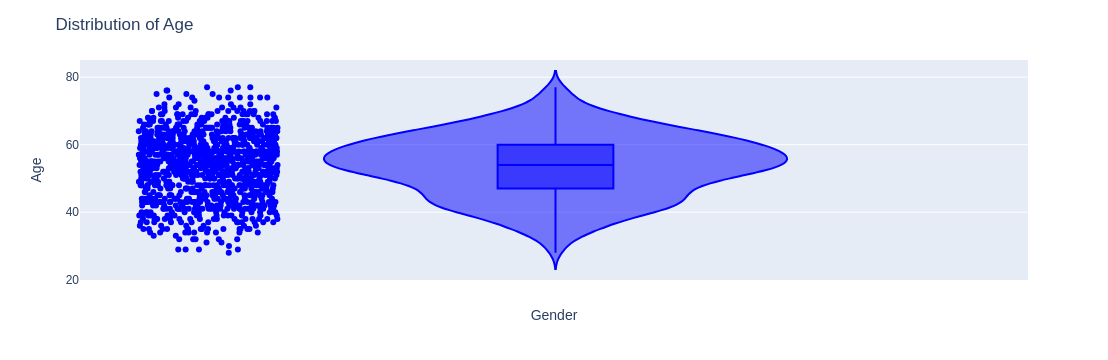

In [14]:
# Creaing a violinplot using ".violinplot()" of seaborn for 'Age wise distribution'

fig = px.violin(
    heart, y="age", box=True, points="all", color_discrete_sequence=["blue"]
)

# Update the layout of the plot (optional)
fig.update_layout(
    # Title for Violin plot
    title="Distribution of Age",
    # axis for visualization
    xaxis_title="Gender",
    yaxis_title="Age",
    showlegend=False,  # Hide the legend if not needed
)

# Show the plot
fig.show()

> - As we can see from the above **violin plot** , the **average age** of patients is around **55**.


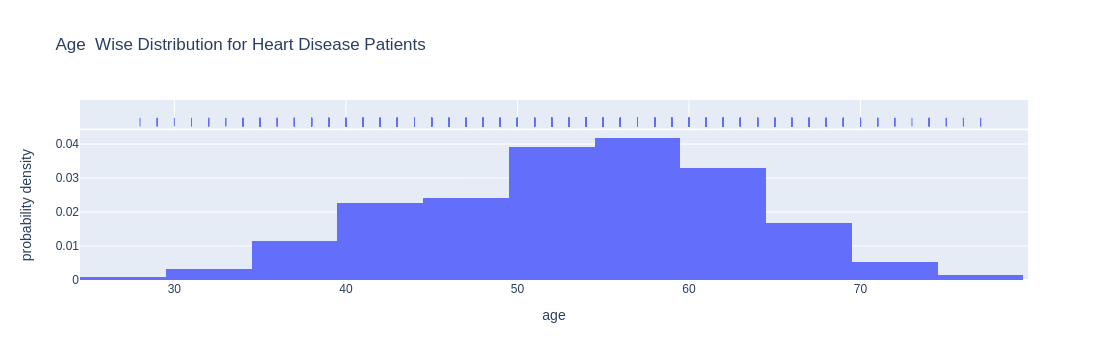

In [15]:
# Creaing a KDEplot using .displot() of seaborn for 'Age wise distribution'

# Create a histogram with KDE
fig = px.histogram(
    heart,
    x="age",
    nbins=10,
    marginal="rug",
    # Title for histogram
    title="Age  Wise Distribution for Heart Disease Patients ",
    # specify the density interms of probability
    histnorm="probability density",
)

# Show the plot
fig.show()

> - From the above **KDE plot**, the **mean age** for **heart disease** patients is around **50 to 60 years**
> - The overall **average is 55**
> - The probability denisty is around **0.4184874**


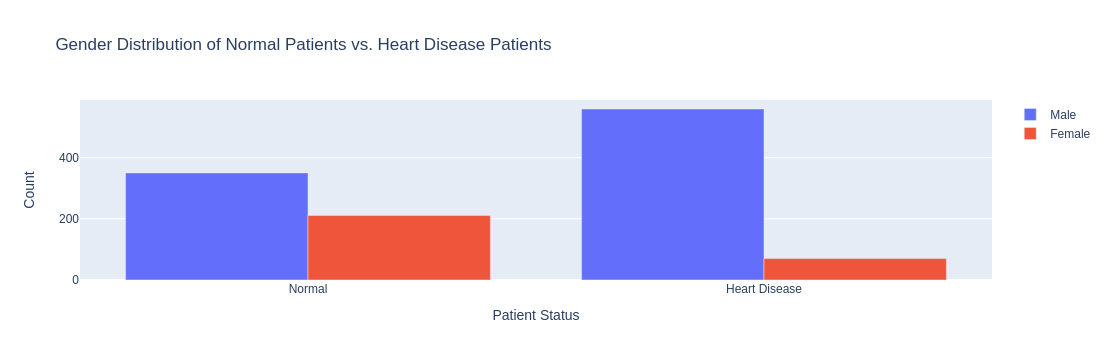

In [16]:
# Creaing a countplot for 'Gender wise distribution of normal vs heart disease patients'

# Create a grouped bar chart
fig = go.Figure(
    data=[
        go.Bar(
            name="Male",
            x=["Normal", "Heart Disease"],
            y=heart[heart["sex"] == 1]["target"].value_counts().sort_index(),
        ),
        go.Bar(
            name="Female",
            x=["Normal", "Heart Disease"],
            y=heart[heart["sex"] == 0]["target"].value_counts().sort_index(),
        ),
    ]
)

# Update the layout
fig.update_layout(
    # Title for grouped bar chart
    title="Gender Distribution of Normal Patients vs. Heart Disease Patients",
    # axis of grouped bar chart
    xaxis_title="Patient Status",
    yaxis_title="Count",
    barmode="group",
)

# Show the plot
fig.show()

- As we can see from above **plot**, it indicates that **more male** patients **accounts** for **heart disease** in comparison to **females**.


In [18]:
# Creating a pairplot using .pairplot() of sns library to know about the pairwise relationships across an entire dataframe.
# Here in this case we only considered for numeical features.

# sns.pairplot(
#     heart,
#     hue="target",
#     vars=[
#         "age",
#         "resting_blood_pressure",
#         "cholesterol",
#         "max_heart_rate_achieved",
#         "old_peak",
#     ],
#     palette="bwr",
# )

<!-- - From the above **pairplot**, it is clear that as the **age increases** chances of **heart disease increases** and also various **feature relationships** can also be attained ... For example if we consider the **old_peak relation** the rate of heart disease **increases** when the value of **old_peak** is above **1.4**. -->


<!-- - The above table also represents how **old_peak** values **relates** with the **heart disease rate** in real time...where it states when the old_peak is **>= 1.5** the **risk** of heart disease **increases**.Therefore, the pairplot **feature wise relationship** is **accurate**. -->


C:\Users\Mjuni Abel\AppData\Local\Temp\ipykernel_7488\1130321696.py:27: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



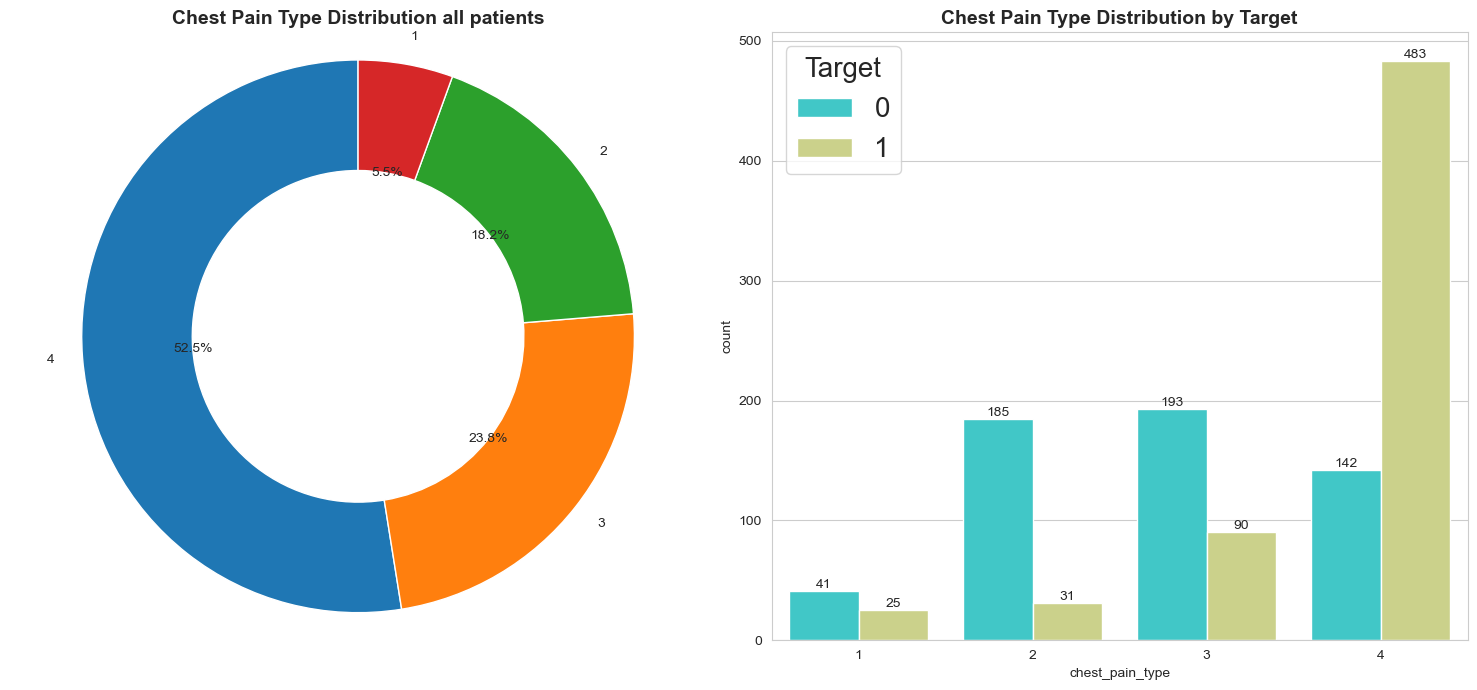

In [17]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Countplot for Chest Pain Type Distribution
ax1 = sns.countplot(x=heart["chest_pain_type"], data=heart, palette="rainbow", ax=ax1)
ax1.set_title("Chest Pain Type Distribution of Patients", weight="bold", fontsize=14)

# Countplot for Chest Pain Type Distribution by Target
ax2 = sns.countplot(
    x=heart["chest_pain_type"], data=heart, hue="target", palette="rainbow", ax=ax2
)
ax2.set_title("Chest Pain Type Distribution by Target", weight="bold", fontsize=14)
ax2.legend(title="Target", title_fontsize=20, fontsize=20)

# To show count values above the plots
for i in ax1.containers:
    ax1.bar_label(i)

for i in ax2.containers:
    ax2.bar_label(i)

# Create a donut chart
donut_data = heart["chest_pain_type"].value_counts()
labels = donut_data.index
sizes = donut_data.values

ax3 = plt.subplot(1, 2, 1, aspect="equal")
ax3.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w"),
)
ax3.set_title(
    "Chest Pain Type Distribution all patients",
    weight="bold",
    fontsize=14,
)

# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis("equal")

# Display the plot
plt.tight_layout()
plt.show()

> - As we can see from above plots, nearly **52.5%** of the heart disease patients have **asymptomatic chest pain**.

> - Also **483 of target** have **asymptomatic chest pain**


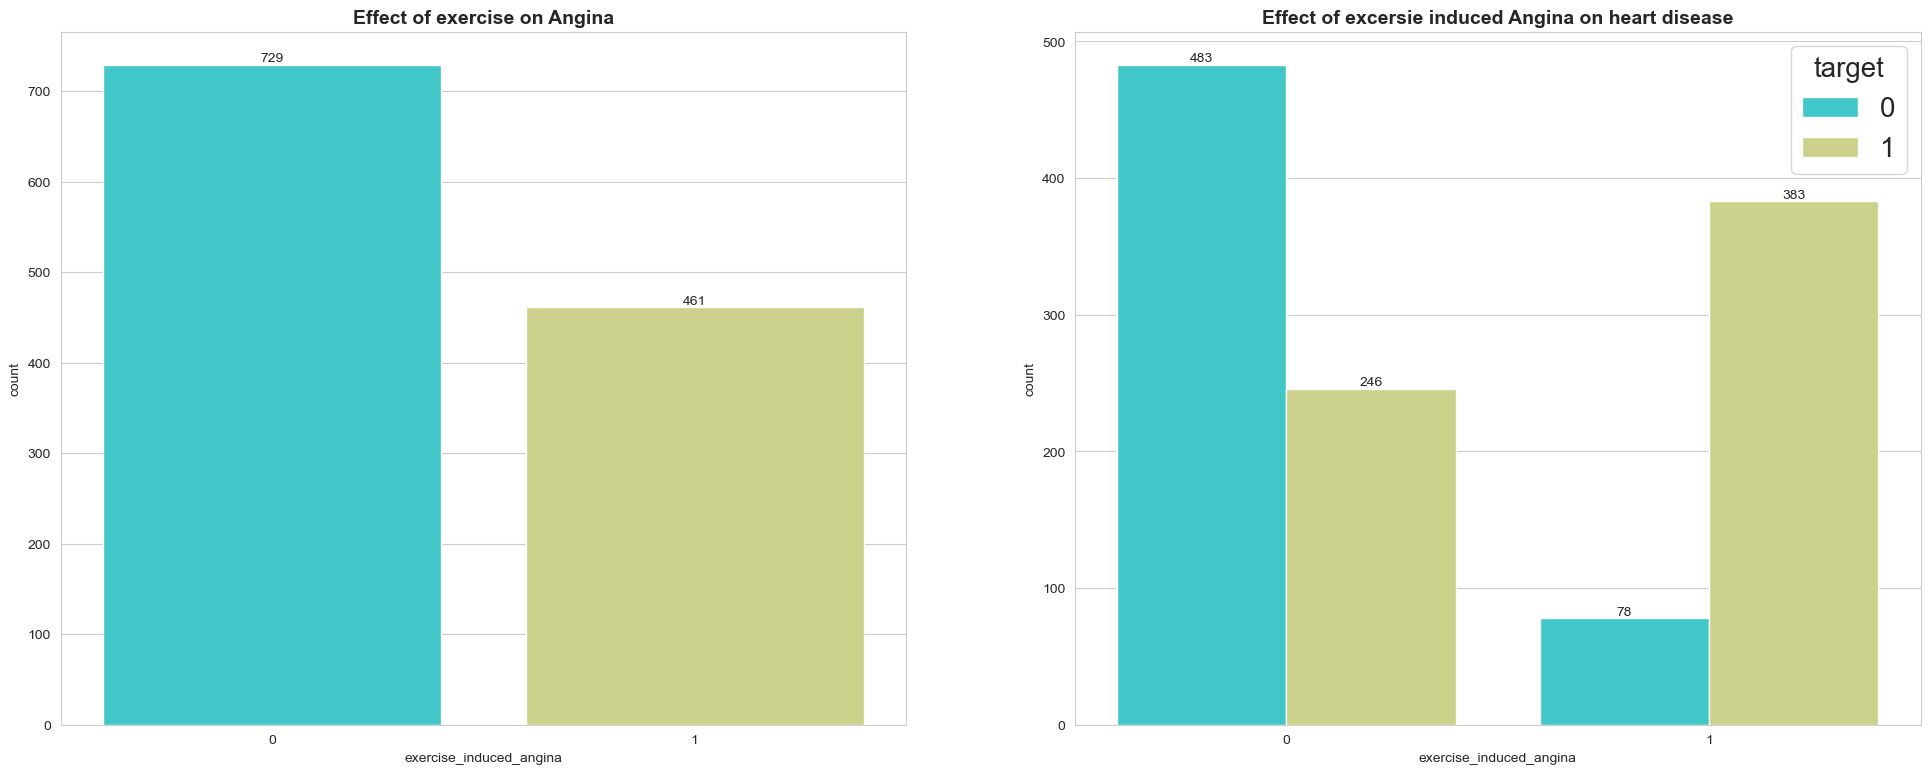

In [18]:
# Creating the countplot
# First create a space for the countplots

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 9))
ax1 = sns.countplot(
    x=heart["exercise_induced_angina"], data=heart, palette="rainbow", ax=ax1
)
ax2 = sns.countplot(
    x=heart["exercise_induced_angina"],
    data=heart,
    hue="target",
    palette="rainbow",
    ax=ax2,
)

# Adding title

ax1.set_title("Effect of exercise on Angina", weight="bold", fontsize=14)
ax2.set_title(
    "Effect of excersie induced Angina on heart disease", weight="bold", fontsize=14
)
ax2.legend(title="target", title_fontsize="20", fontsize=20)

# To show up count values above the plots

for i in ax1.containers:
    ax1.bar_label(
        i,
    )

for i in ax2.containers:
    ax2.bar_label(
        i,
    )

# Enable visualization using .show() function of matplotlib

plt.show()

**Angina** is a type of **chest pain** due to **reduced blood flow** to the heart. Angina is a major **symptom** of **coronary artery disease (CAD)**. Angina tends to appear usually during physical activity **(excersie)**, emotional stress, or exposure to cold temperatures, or after big meals.

- As we can see from above plots, nearly **83%** of the patients are **affected** by heart disease if they are aldready been **concerned** by **angina induced by excersie**.


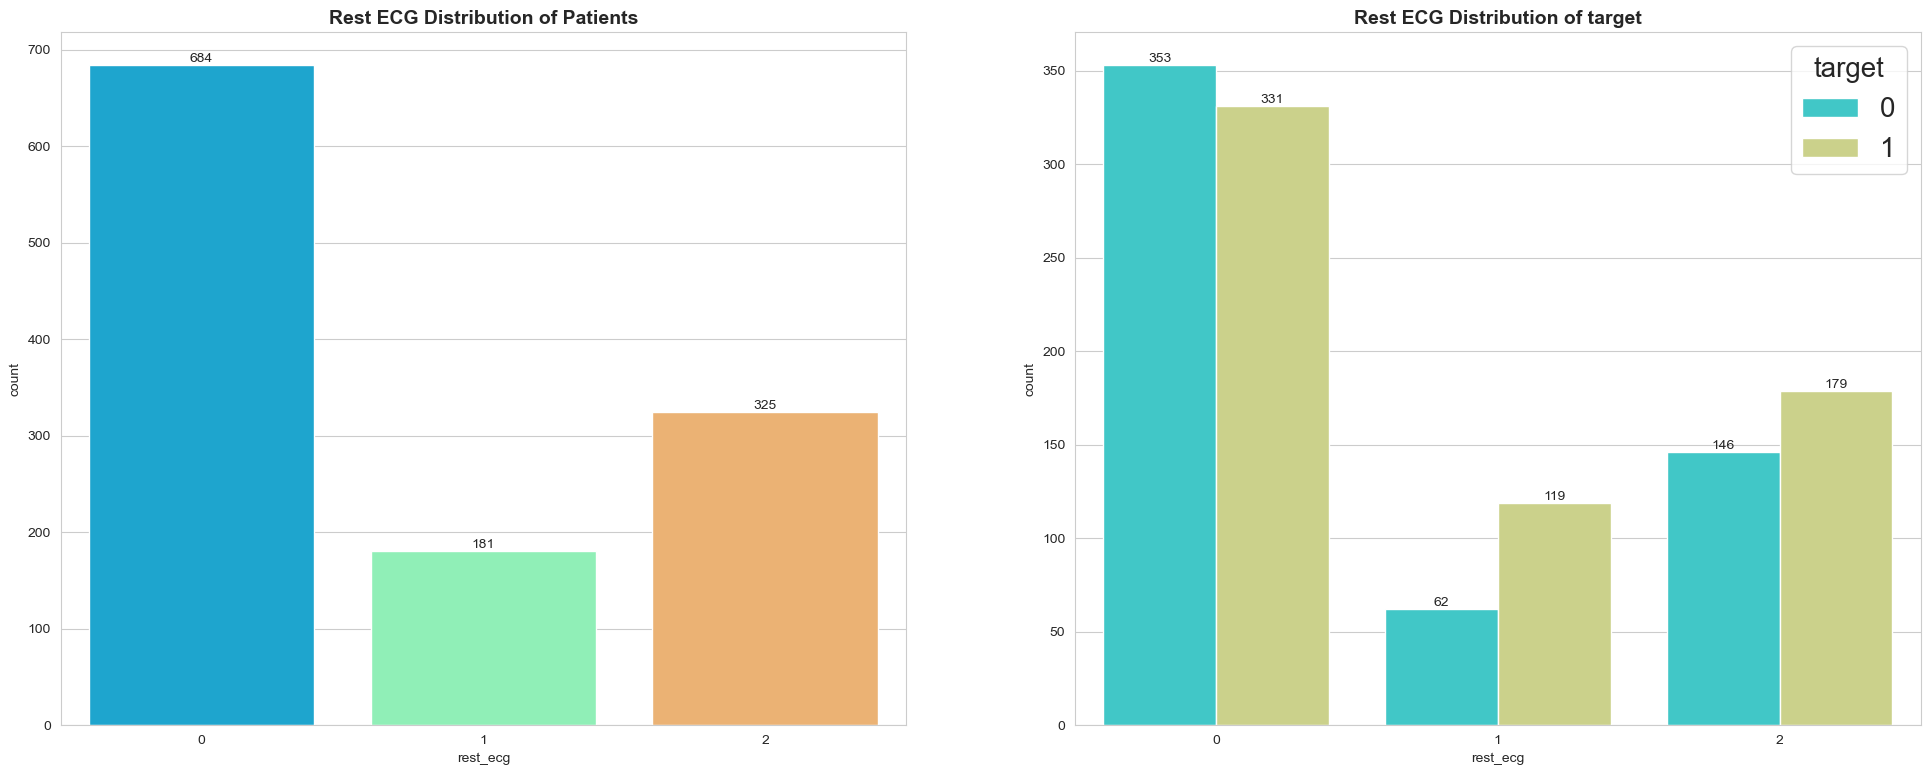

In [103]:
# Creating the countplot
# First create a space for the countplots

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 9))
ax1 = sns.countplot(x=heart["rest_ecg"], data=heart, palette="rainbow", ax=ax1)
ax2 = sns.countplot(
    x=heart["rest_ecg"], data=heart, hue="target", palette="rainbow", ax=ax2
)

# Adding title

ax1.set_title("Rest ECG Distribution of Patients", weight="bold", fontsize=14)
ax2.set_title("Rest ECG Distribution of target", weight="bold", fontsize=14)
ax2.legend(title="target", title_fontsize="20", fontsize=20)

# To show up count values above the plots

for i in ax1.containers:
    ax1.bar_label(
        i,
    )

for i in ax2.containers:
    ax2.bar_label(
        i,
    )

# Enable visualization using .show() function of matplotlib

plt.show()

**Electrocardiograms** — also called **ECGs**or **EKGs** which is used to just records the **electrical signals** in our **heart**.And also it's a common test used to detect **heart problems** and **monitor the heart's status**. On the other hand it also has some **limits** like it can only measure the **heart rate** and **rhythm** whereas it doesn’t necessarily show **blockages in the arteries**.

- Thats the reason why in this dataset around **52% heart disease patients** have **normal ECG**.


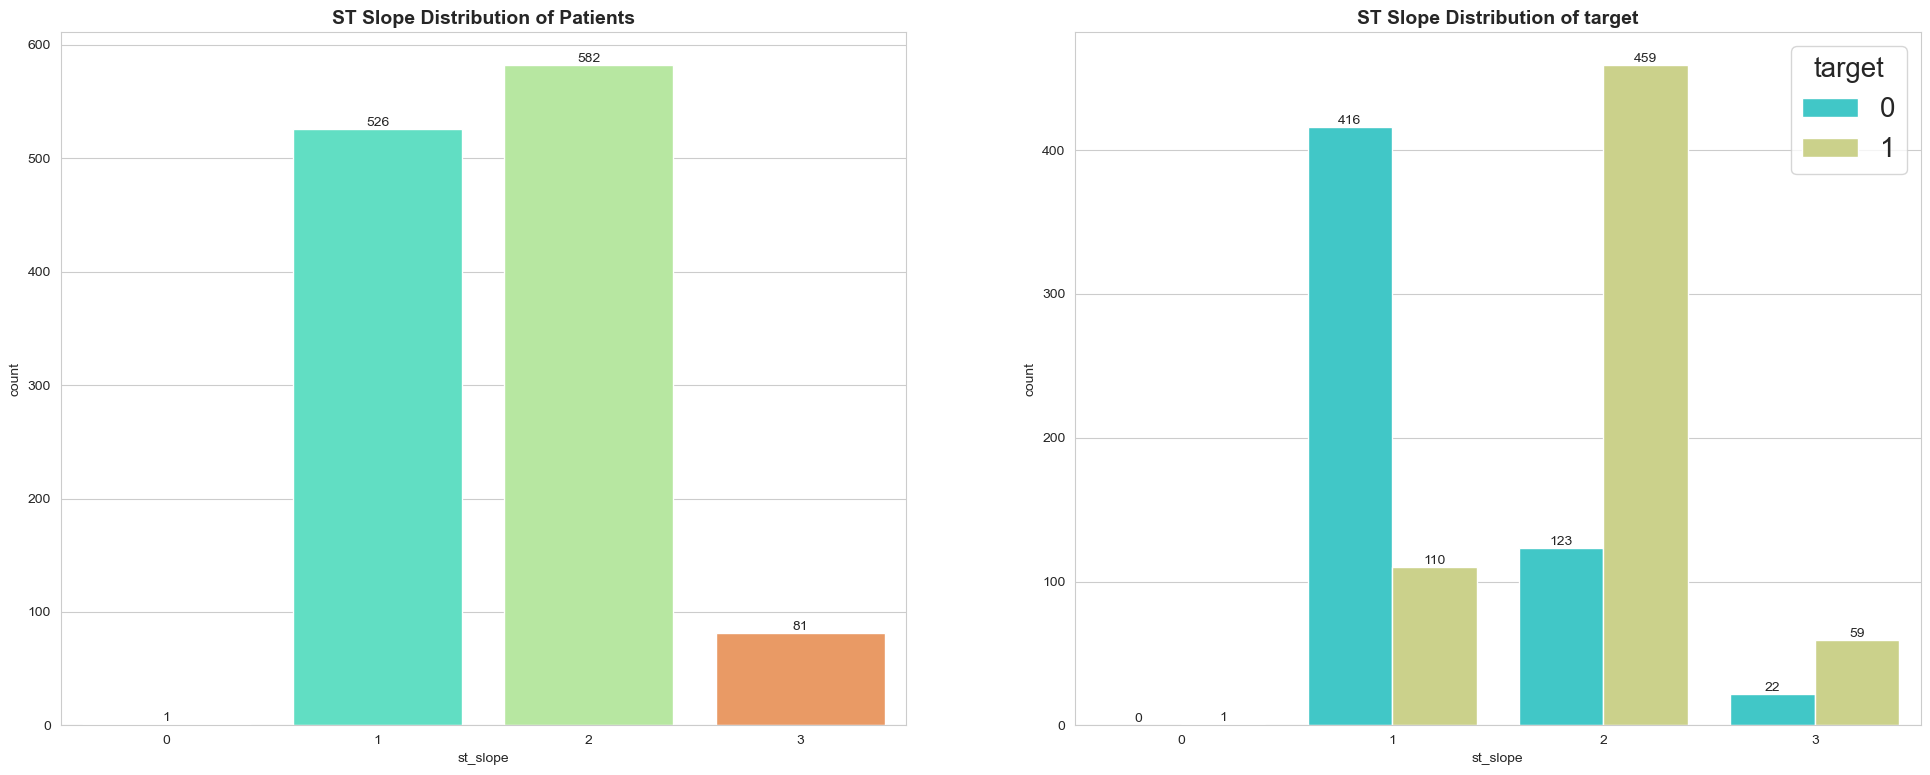

In [104]:
# Creating the countplot
# First create a space for the countplots

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 9))
ax1 = sns.countplot(x=heart["st_slope"], data=heart, palette="rainbow", ax=ax1)
ax2 = sns.countplot(
    x=heart["st_slope"], data=heart, hue="target", palette="rainbow", ax=ax2
)

# Adding title

ax1.set_title("ST Slope Distribution of Patients", weight="bold", fontsize=14)
ax2.set_title("ST Slope Distribution of target", weight="bold", fontsize=14)
ax2.legend(title="target", title_fontsize="20", fontsize=20)

# To show up count values above the plots

for i in ax1.containers:
    ax1.bar_label(
        i,
    )

for i in ax2.containers:
    ax2.bar_label(
        i,
    )

# Enable visualization using .show() function of matplotlib

plt.show()

The **ST slope /heart rate slope** (ST/HR slope), has been proposed as a more accurate **ECG criterion** for **identifying** significant **coronary artery disease**.

- Also from the plot we can **inference** that **upsloping** is a **positive sign** as nearly **74%** of the **normal patients** have upslope where as **72.98% heart patients** have **flat sloping**.


# 5. Models for Predicting the Heart disease for a patient based on the medical conditions.


# **Five models are used for Predicting the Heart disease for a patient based on the medical conditions.**

> - **logistic Regresion**
> - **Support Vector Machines**
> - **Random Forest Classifier**
> - **K- nearest neighbors**
> - **Decision Tree Classifier**


# Model 1 : Predicting the Heart disease for a patient based on the medical conditions.

- Here we will be building **multiple logistic regression** model to predict wheather the patient is having **heart disease** or not based on the **medical conditions** like **chest_pain_type, resting_ecg, st_slope** etc...
- Before moving on to the next step we will be loading up the original dataset which was before **data cleaning and preprocessing**.
- We will call this dataset as **old_heart**.


In [19]:
# Importing the Dataset using .read_csv() function of pandas
# We will call the dataset as 'old_heart'

old_heart = pd.read_csv("heart diseases.csv")
old_heart

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [20]:
# Checking the head of the dataframe
old_heart.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Before** moving on to **training** and **testing** the model let's **scale** the dataframe using **Standardscaler**. **Standardization** scales each **input variable** separately so that the **mean** of the observed values is **0** and the **standard deviation** is **1**.


In [21]:
# Time to standardize the variables
# Import StandardScaler from Scikit learn library

from sklearn.preprocessing import StandardScaler

In [22]:
# Create a StandardScaler() object called scaler
scaler = StandardScaler()

In [23]:
# Fitting scaler to the features
scaler.fit(old_heart.drop("target", axis=1))

StandardScaler()

In [24]:
# Use the .transform() method to transform the features to a scaled version
scaled_data = scaler.transform(old_heart.drop("target", axis=1))

In [25]:
# Convert the scaled_data to a dataframe and check the head of this dataframe to make sure the scaling worked.
olds_heart = pd.DataFrame(scaled_data, columns=old_heart.columns[:-1])
olds_heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217


In [26]:
# Checking out wheather the mean() = 0 and std() = 1
olds_heart.std()

age                    1.00042
sex                    1.00042
chest pain type        1.00042
resting bp s           1.00042
cholesterol            1.00042
fasting blood sugar    1.00042
resting ecg            1.00042
max heart rate         1.00042
exercise angina        1.00042
oldpeak                1.00042
ST slope               1.00042
dtype: float64

In [27]:
olds_heart.mean()

age                   -2.627217e-16
sex                    8.359326e-17
chest pain type       -2.985474e-18
resting bp s           3.030256e-16
cholesterol            7.165137e-17
fasting blood sugar    5.970947e-17
resting ecg           -2.388379e-17
max heart rate        -4.060244e-16
exercise angina        7.762232e-17
oldpeak                8.956421e-17
ST slope              -3.582568e-17
dtype: float64

Therefore the **scaling operation** worked out. So,lets move on further by **training and testing** the model.


In [28]:
# Importing train test split from scikit learn library
from sklearn.model_selection import train_test_split

In [29]:
# Defining features and labels
X = scaled_data
y = old_heart["target"]

In [30]:
# Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [31]:
# Importing LogisticRegression model from scikit learn library
from sklearn.linear_model import LogisticRegression

In [32]:
# Creating an instance of a LogisticRegression() model named lv
lv = LogisticRegression()

In [33]:
# Fitting the lv model with training set
lv.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Predicting the y values by using the .predict() function
prediction = lv.predict(X_test)

In [35]:
# Importing classification report and confusion matrix from scikit learn library to evaluate precision,recall,f1-score.
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(confusion_matrix(y_test, prediction))

[[162  23]
 [ 25 147]]


In [37]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       185
           1       0.86      0.85      0.86       172

    accuracy                           0.87       357
   macro avg       0.87      0.87      0.87       357
weighted avg       0.87      0.87      0.87       357



## Inference from Model 1

1. From the evaluation of model, by looking into the **confusion matrix** it indicates that the **false negatives and false positives values** are **higher** which is **not a good result**. Lesser the value, better is the model.
2. Ans also by noticing the **classification report** that values of precision, recall, f1-score is **not much good** as in overall all the **evaluation metrics** lies between **0.85 - 0.88**.


# Model 2 : Predicting the Heart disease for a patient based on the medical conditions using Support Vector Machines.


In [38]:
# Importing train test split from scikit learn library
from sklearn.model_selection import train_test_split

In [39]:
# Defining features and labels
X = scaled_data
y = old_heart["target"]

In [40]:
# Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [41]:
# Importing Support Vector Machine Classifier model from scikit learn library
from sklearn.svm import SVC

In [42]:
# Creating an instance of a Support Vector Classifier() model named rd
rd = SVC()

In [43]:
# Fitting the rd model with training set
rd.fit(X_train, y_train)

SVC()

In [44]:
# Predicting the y values by using the .predict() function
pred = rd.predict(X_test)

In [45]:
# Importing classification report and confusion matrix from scikit learn library to evaluate precision,recall,f1-score.
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.89       185
           1       0.84      0.95      0.89       172

    accuracy                           0.89       357
   macro avg       0.89      0.89      0.89       357
weighted avg       0.89      0.89      0.89       357



In [47]:
print(confusion_matrix(y_test, pred))

[[154  31]
 [  9 163]]


# Inference from Model 2

1. From the evaluation of model, by looking into the **confusion matrix** it indicates that the **false negatives and false positives values** are **lesser** compared to that of normal logistic model.
2. Ans also by noticing the **classification report** that values of precision, recall, f1-score is relatively **higher** compared to that of normal logistic regression model. Thus in overall all the **evaluation metrics** lies from **0.83 - 0.95**.


# Model 3 : Predicting the Heart disease for a patient based on the medical conditions using Random Forest Classifier.


In [134]:
# Importing Random Forest Classifier model from scikit learn library
from sklearn.ensemble import RandomForestClassifier

In [135]:
X = scaled_data
y = old_heart["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [136]:
# Creating an instance of a Random Forest Classifier() model named rfc
rfc = RandomForestClassifier(n_estimators=200)

In [137]:
# Fitting the rfc model with training set
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [138]:
# Predicting the y values by using the .predict() function
rfc_pre = rfc.predict(X_test)

In [139]:
# Importing classification report and confusion matrix from scikit learn library to evaluate precision,recall,f1-score.
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
print(confusion_matrix(y_test, rfc_pre))

[[166  19]
 [ 10 162]]


In [141]:
print(classification_report(y_test, rfc_pre))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       185
           1       0.90      0.94      0.92       172

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357



# Inference from Model 3

1. Alright now by looking into the **confusion matrix** it indicates that the **false negatives and false positives values** are **very less** which results in a **good outcome**.
2. Ans also by noticing the **classification report** that values of precision, recall, f1-score is **much higher** compared to the prior models. Thus in overall all the **evaluation metrics** lies between **0.90 - 0.95**.


# Model 4 : Predicting the Heart disease for a patient based on the medical conditions using KNearest~Neighbors(Knn).


In [173]:
# Import the libraries for some metrics and neighbors
from sklearn import neighbors, metrics

In [174]:
# Defines X and Y before we split our data
X = heart
y = heart.target
print(X.shape)
print(y.shape)

# Train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 20% of our data will be tested and the rest will be trained

(1190, 12)
(1190,)
(952, 12)
(238, 12)
(952,)
(238,)


In [175]:
## Creating an instance of a .KNeighborsClassifier() model named knn
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights="uniform")

In [176]:
# Fitting the knn model with training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [177]:
# Predicting the y values by using the .predict() function
knn_pre = knn.predict(X_test)

In [178]:
# Importing classification report and confusion matrix from scikit learn library to evaluate precision,recall,f1-score.
from sklearn.metrics import classification_report, confusion_matrix

In [148]:
print(confusion_matrix(y_test, knn_pre))

[[84 43]
 [27 84]]


In [179]:
print(classification_report(y_test, knn_pre))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       127
           1       0.66      0.76      0.71       111

    accuracy                           0.71       238
   macro avg       0.71      0.71      0.71       238
weighted avg       0.71      0.71      0.71       238



# Model 5 : Predicting the Heart disease for a patient based on the medical conditions using Decision Tree.


In [150]:
# Importing DecisionTreeClassifier model from scikit learn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [180]:
# Defines X and Y before we split our data
X = heart
y = heart.target
print(X.shape)
print(y.shape)

# Train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 30% of our data will be tested and the rest will be trained

(1190, 12)
(1190,)
(952, 12)
(238, 12)
(952,)
(238,)


In [181]:
# Creating an instance of a .DecisionTreeClassifier()  model named clf
clf_entropy = DecisionTreeClassifier(
    criterion="entropy", max_depth=3, min_samples_leaf=5
)

In [182]:
# Fitting the clf_entropy model with training set
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [183]:
# Predicting the y values by using the .predict() function
pred_en = clf_entropy.predict(X_test)

In [184]:
# Importing classification report and confusion matrix from scikit learn library to evaluate precision,recall,f1-score.
from sklearn.metrics import classification_report, confusion_matrix

In [185]:
print(confusion_matrix(y_test, pred_en))

[[127   0]
 [  0 111]]


In [187]:
print(classification_report(y_test, pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       111

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238



# 6. Conclusion


# Overall Summary

1. In this notebook, we have studied the relationship between the **11 features** and a **target variable**.
2. The top **6** most contribution features are **st_slope (upsloping), age, chest_pain_type (asymptomatic), excercise_induced_angina, sex and old_peak**.
3. Additionaly the **top 3** features to make a note is whenever **st_slope** is of kind **upsloping** it reduces the risk of heart disease. Whereas in next case, whenever a person has **st_slope_flat** and **excercise_induced_angina** the person is **more likely** to have a heart disease.
4. So, this is how you perform a **Classification analysis** on a given dataset.
